<a href="https://colab.research.google.com/github/aryanKamat007/Python-Machine-learning/blob/main/cnn_galaxy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
device_list=tf.test.gpu_device_name()

In [ ]:
device_list

'/device:GPU:0'

In [ ]:
CUDA_VISIBLE_DEVICES=[0] python test.py --name [NAME]

In [ ]:
import tensorflow
from tensorflow import _keras
from keras import layers,models,optimizers,losses,metrics
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import scipy

In [ ]:
# Define your CNN model
image_width, image_height = 224, 224
batch_size = 32
num_epochs = 20

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Three classes

model.build((None, image_width, image_height, 3))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 26, 26, 64)      

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Train the model
model.fit(train_generator, epochs=num_epochs)

Epoch 1/20
38/38 [==============================] - 276s 7s/step - loss: 1.1336 - accuracy: 0.4350
Epoch 2/20
38/38 [==============================] - 23s 600ms/step - loss: 1.0127 - accuracy: 0.5100
Epoch 3/20
38/38 [==============================] - 22s 584ms/step - loss: 0.9416 - accuracy: 0.5992
Epoch 4/20
38/38 [==============================] - 22s 556ms/step - loss: 0.8705 - accuracy: 0.6358
Epoch 5/20
38/38 [==============================] - 22s 568ms/step - loss: 0.8324 - accuracy: 0.6742
Epoch 6/20
38/38 [==============================] - 23s 600ms/step - loss: 0.7957 - accuracy: 0.6467
Epoch 7/20
38/38 [==============================] - 21s 554ms/step - loss: 0.7532 - accuracy: 0.6867
Epoch 8/20
38/38 [==============================] - 23s 597ms/step - loss: 0.7781 - accuracy: 0.6658
Epoch 9/20
38/38 [==============================] - 22s 574ms/step - loss: 0.7558 - accuracy: 0.6842
Epoch 10/20
38/38 [==============================] - 23s 600ms/step - loss: 0.6930 - accuracy

In [ ]:
# Load and preprocess the input image
input_image_path = '/content/drive/MyDrive/train_images/spiral/107202.jpg'  # Replace with the path to your input image
img = image.load_img(input_image_path, target_size=(image_width, image_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize pixel values (if not already normalized)

1/1 [==============================] - 0s 25ms/step


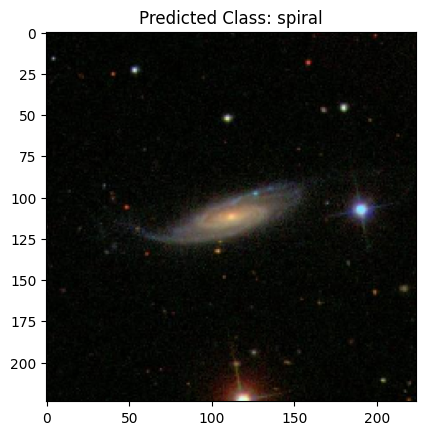

In [ ]:
# Classify the input image
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction)
labels = ['spiral', 'elliptical', 'irregular']
predicted_class = labels[predicted_class_index]

# Display the input image and classification
plt.imshow(img[0])
plt.title(f'Predicted Class: {predicted_class}')
plt.show()